In [4]:
pwd

'D:\\Project_2022\\Quora Question Pairs'

In [5]:
from zipfile import ZipFile

with ZipFile("D:\\Project_2022\\Quora Question Pairs\\train.csv.zip",'r') as ob:
    ob.extractall("D:\\Project_2022\\Quora Question Pairs\\train.csv")

In [8]:
ls

 Volume in drive D has no label.
 Volume Serial Number is 5A06-FE63

 Directory of D:\Project_2022\Quora Question Pairs

10/08/2022  12:17 PM    <DIR>          .
10/08/2022  12:17 PM    <DIR>          ..
10/08/2022  12:12 PM    <DIR>          .ipynb_checkpoints
10/08/2022  12:17 PM    <DIR>          train.csv
10/08/2022  05:17 AM        22,202,741 train.csv.zip
10/08/2022  12:16 PM             1,102 Untitled.ipynb
               2 File(s)     22,203,843 bytes
               4 Dir(s)  484,175,220,736 bytes free


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("train.csv/train.csv")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [13]:
df.shape

(404290, 6)

In [18]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
102323,102323,169305,169306,What are some basic graph theory questions (BF...,Where can I get Dynamic Programming questions ...,0
228414,228414,337482,337483,What are the cheapest college/university in Ca...,What is the most expensive university in Canad...,0
220536,220536,12920,327647,How can I read Facebook messenger messages wit...,Is there a way to view messages in Facebook Me...,1
309769,309769,433802,433803,My right eye seems to be blurred. What could b...,What causes your right eye to flicker?,0
295127,295127,417125,78230,What are some major social faux pas to avoid w...,What are some major social faux pas to avoid w...,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [20]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [22]:
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

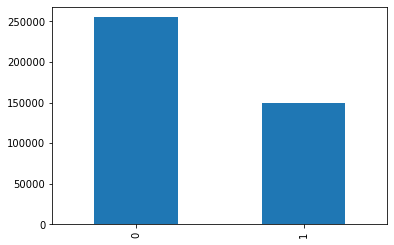

In [31]:
## ratio of duplicate vs non duplicate

print(df['is_duplicate'].value_counts())

print((df['is_duplicate'].value_counts()*100)/df['is_duplicate'].count())

df['is_duplicate'].value_counts().plot(kind='bar')

In [32]:
## repeated questions 

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f"number of unique questions : {np.unique(qid).shape[0]}")

x = qid.value_counts() >1
print(f"number of questions getting repeated : {x[x].shape[0]}")

number of unique questions : 537933
number of questions getting repeated : 111780


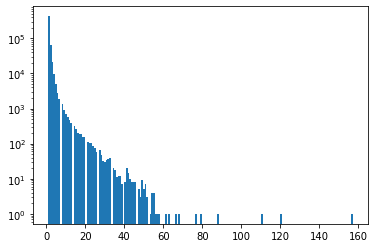

In [39]:
## repeated questions in hist plot

plt.hist(qid.value_counts().values,bins=180)
plt.yscale('log')
plt.show()